In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [84]:
df = pd.read_csv('Flight_Booking.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.sample(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
235155,Vistara,UK-944,Mumbai,Afternoon,one,Morning,Kolkata,Business,18.92,14,80077
41694,Vistara,UK-981,Delhi,Night,one,Morning,Chennai,Economy,14.17,41,5098
171237,Air_India,AI-543,Hyderabad,Morning,two_or_more,Afternoon,Kolkata,Economy,27.50,7,11397
2031,GO_FIRST,G8-286,Delhi,Morning,one,Night,Mumbai,Economy,11.00,12,12045
289898,Vistara,UK-838,Chennai,Night,zero,Night,Delhi,Business,2.83,42,27792


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [86]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [87]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

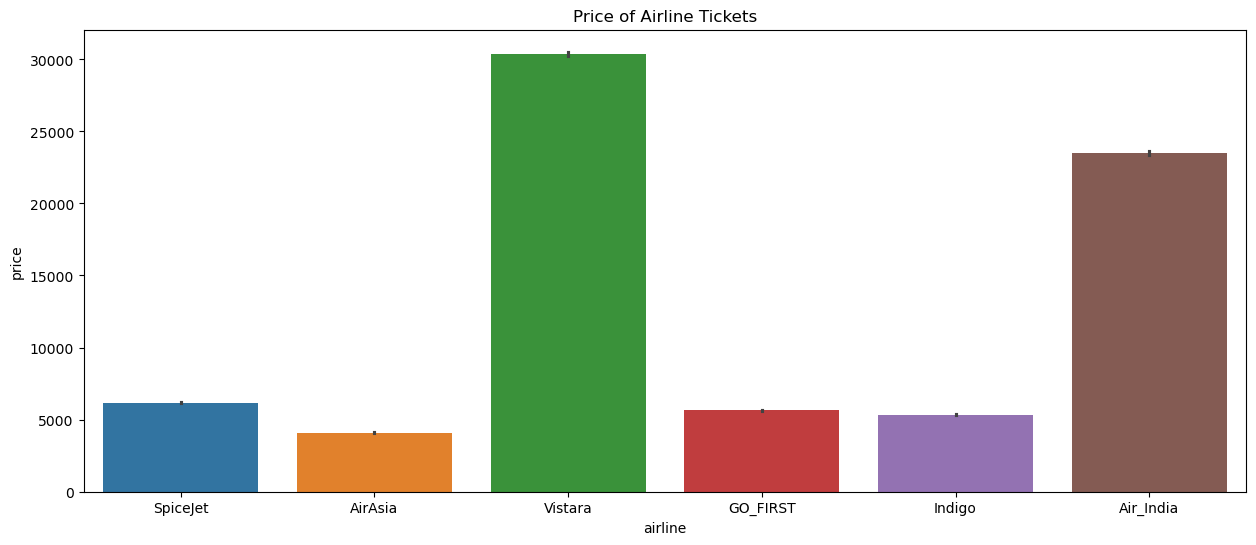

In [88]:
plt.figure(figsize=(15, 6))
sns.barplot(x='airline', y='price', hue='airline', data=df).set_title('Price of Airline Tickets')
plt.show()

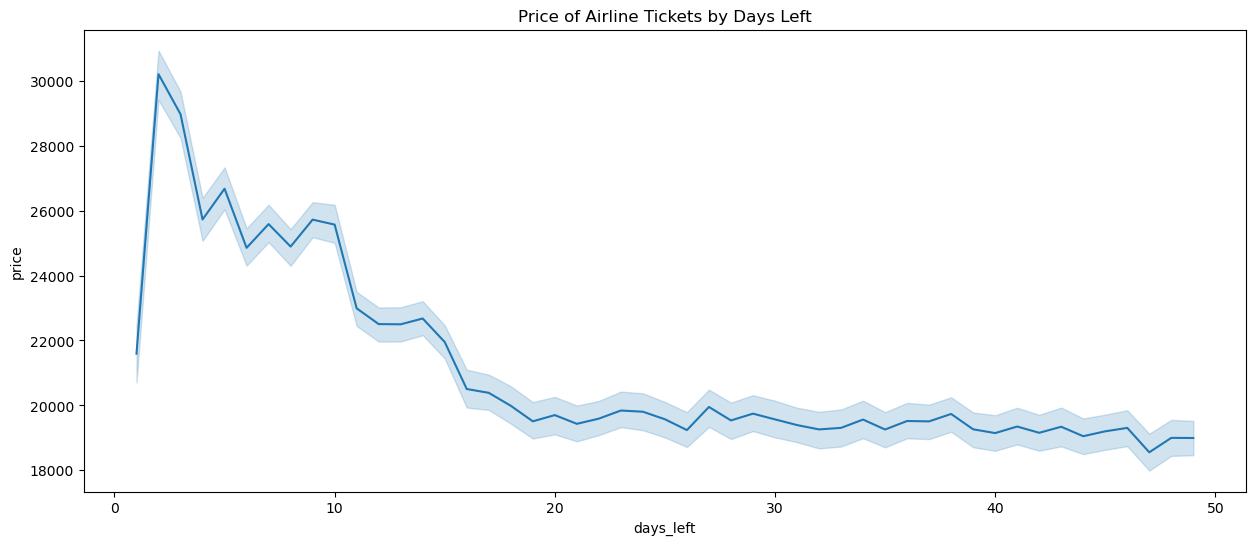

In [89]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='days_left', y='price', data=df).set_title('Price of Airline Tickets by Days Left')
plt.show()

Text(0.5, 1.0, 'Price of Airline Tickets by Class')

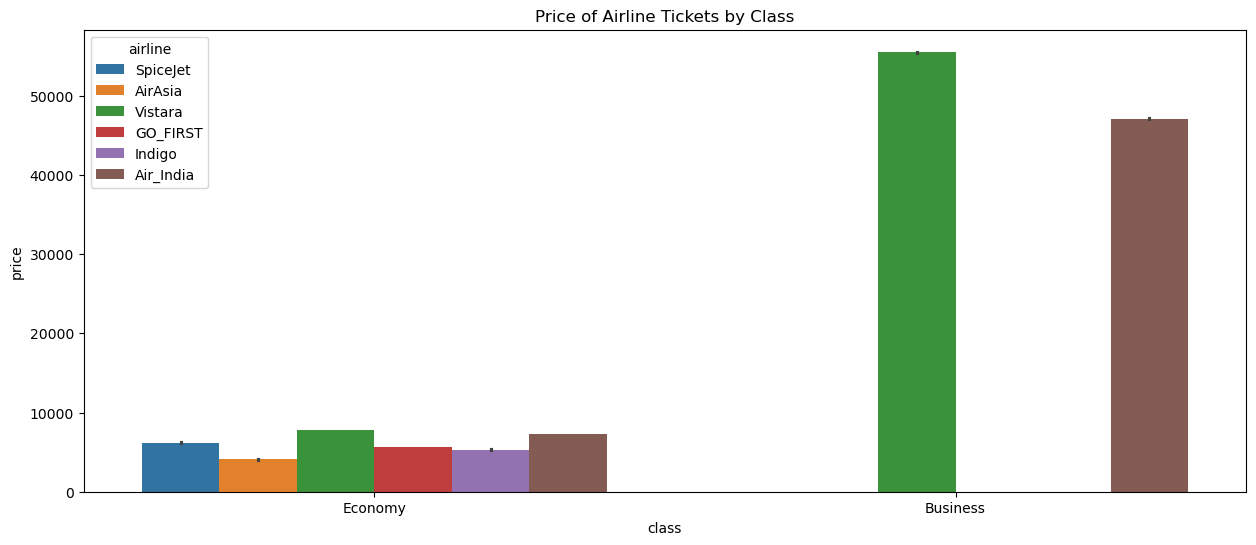

In [90]:
plt.figure(figsize=(15, 6))
sns.barplot(x='class', y='price', hue='airline', data=df).set_title('Price of Airline Tickets by Class')

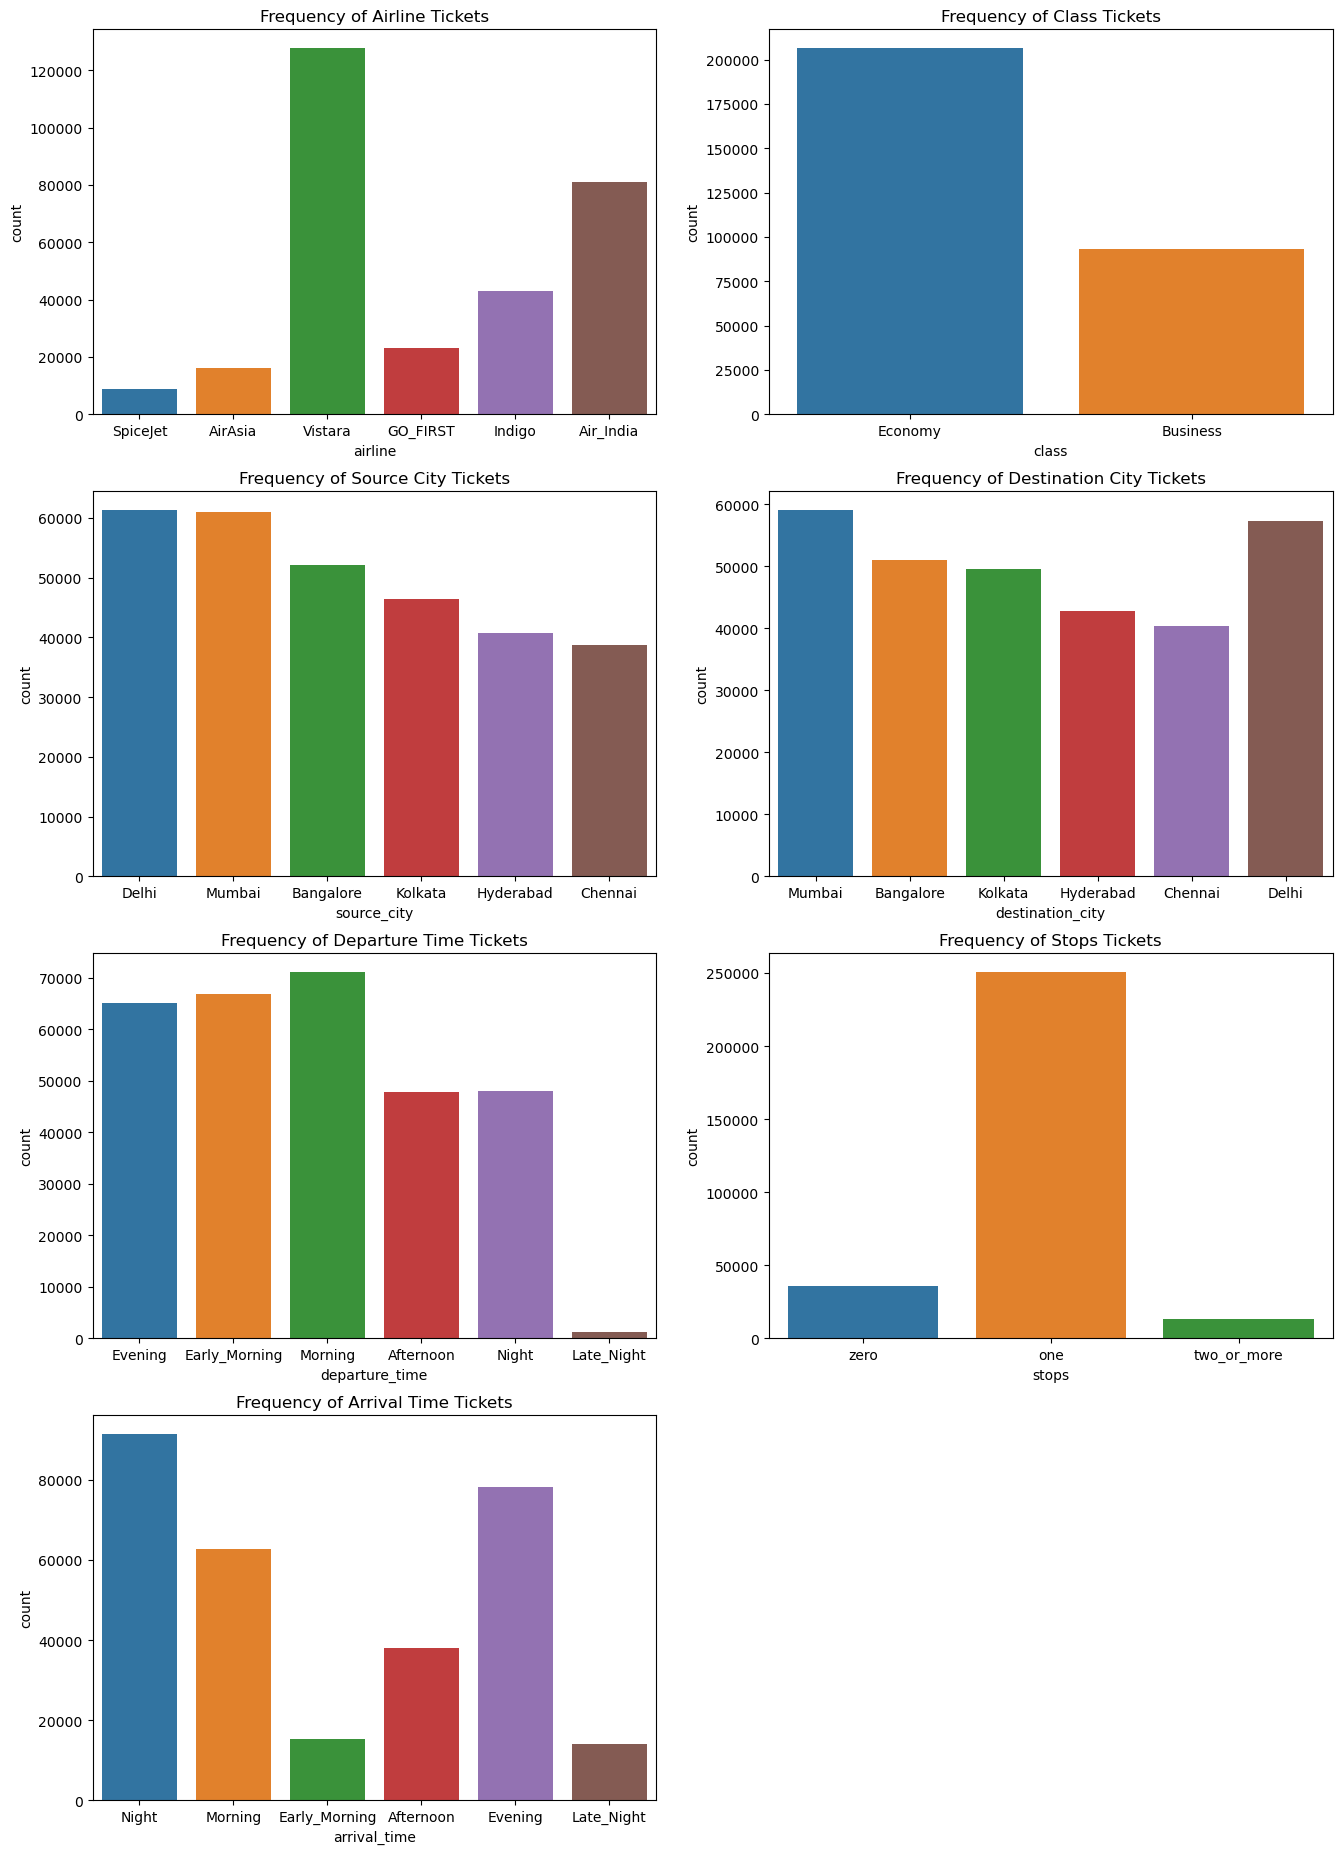

In [91]:
plt.figure(figsize=(16, 23))

plt.subplot(4, 2, 1)
sns.countplot(x='airline',hue='airline', data=df).set_title('Frequency of Airline Tickets')

plt.subplot(4, 2, 2)
sns.countplot(x='class', hue='class', data=df).set_title('Frequency of Class Tickets')

plt.subplot(4, 2, 3)
sns.countplot(x='source_city', hue='source_city', data=df).set_title('Frequency of Source City Tickets')

plt.subplot(4, 2, 4)
sns.countplot(x='destination_city', hue='destination_city', data=df).set_title('Frequency of Destination City Tickets')

plt.subplot(4, 2, 5)
sns.countplot(x='departure_time', hue='departure_time', data=df).set_title('Frequency of Departure Time Tickets')

plt.subplot(4, 2, 6)
sns.countplot(x='stops', hue='stops', data=df).set_title('Frequency of Stops Tickets')

plt.subplot(4, 2, 7)
sns.countplot(x='arrival_time', hue='arrival_time', data=df).set_title('Frequency of Arrival Time Tickets')

plt.show()

In [92]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['airline'] = le.fit_transform(df['airline'])
df['class'] = le.fit_transform(df['class'])
df['source_city'] = le.fit_transform(df['source_city'])
df['destination_city'] = le.fit_transform(df['destination_city'])
df['departure_time'] = le.fit_transform(df['departure_time'])
df['arrival_time'] = le.fit_transform(df['arrival_time'])
df['stops'] = le.fit_transform(df['stops'])
df['flight'] = le.fit_transform(df['flight'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  int32  
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(8), int64(2)
memory usage: 16.0 MB


<Axes: >

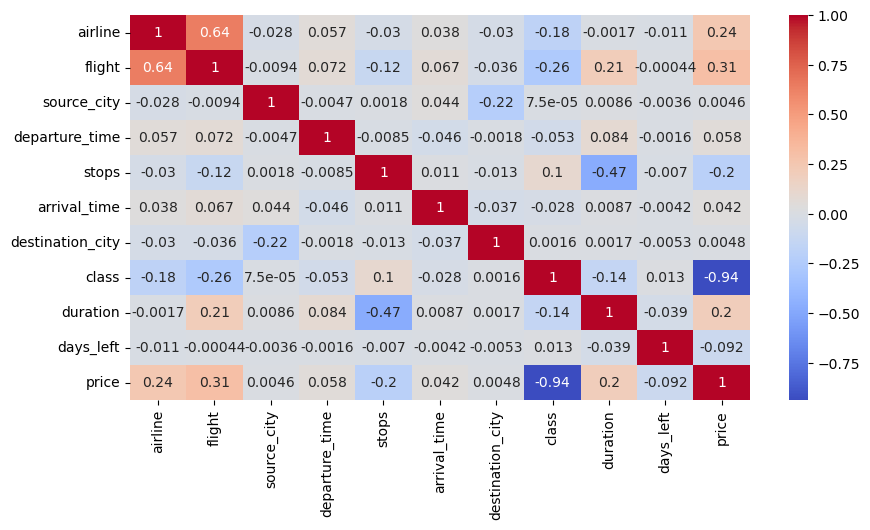

In [93]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = df.drop(columns=['flight'])

col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price')) :
        col_list.append(col)

x = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

print(vif_data)

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


In [101]:
x = df.drop(['price'], axis=1)
y = df['price']

from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error,mean_squared_error

print(r2_score(y_test, y_pred))

print(mean_absolute_error(y_test, y_pred))

print(mean_absolute_percentage_error(y_test, y_pred))

print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.9052362375016471
4614.08574870888
0.43909536797426957
6960.923841519413


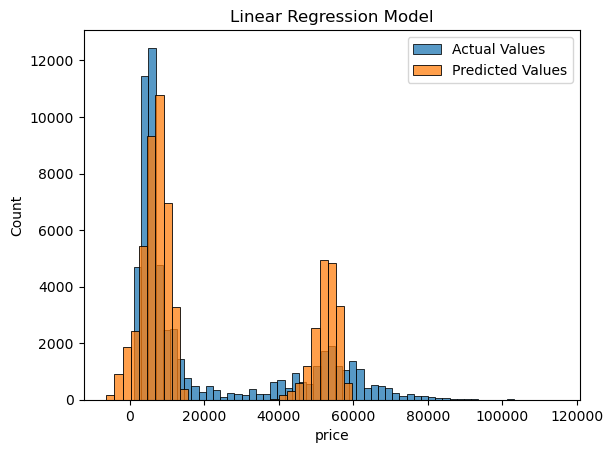

In [102]:
sns.histplot(y_test, label='Actual Values', alpha=0.75)
sns.histplot(y_pred, label='Predicted Values', alpha=0.75)
plt.title('Linear Regression Model')
plt.legend()

In [103]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_absolute_percentage_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.9766606514687755
1159.6548089042885
0.07557866501345653
3454.5389931987006


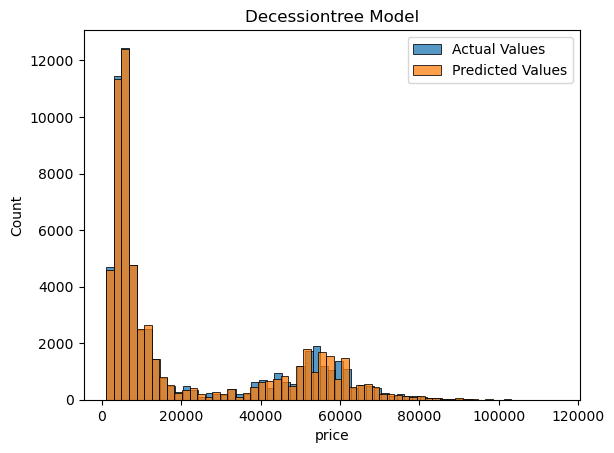

In [104]:
sns.histplot(y_test, label='Actual Values', alpha=0.75)
sns.histplot(y_pred, label='Predicted Values', alpha=0.75)
plt.title('Decessiontree Model')
plt.legend()

In [105]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_absolute_percentage_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.9854334225983749
1077.2288005958526
0.07118616471755322
2729.1317056006487


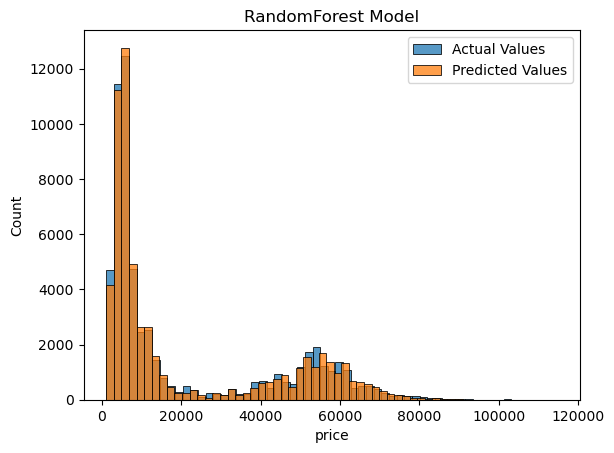

In [106]:
sns.histplot(y_test, label='Actual Values', alpha=0.75)
sns.histplot(y_pred, label='Predicted Values', alpha=0.75)
plt.title('RandomForest Model')
plt.legend()